# SI 618 - Homework #1: Data Manipulation

Version 2024.01.17.2.CT

## Background

This homework assignment focuses on the analysis of biometric data and exercise performance, as well as reviewing some material from our time together in class.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class*, as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, Copilot, or other online resources.  


A total of 100 points is available in this homework assignment, broken down as shown beside each question and in the accompanying rubric in Canvas.  Please note that to receive full points, code should conform to  [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines, and written responses should be grammatically correct, free of spelling errors, and generally follow the [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view) guidelines.  You should review those guidelines before proceding with the assignment.

Where possible, you should "wrap" your code in functions that you write.  This will make it easier to re-use your code in future assignments. **You should also include comments, docstrings, and type hints for each function you write.  Undocumented code will not receive full credit.**

You should insert as many additional cells as you need in order to complete your work.  You should use "code" cells for your code and "markdown" blocks for your explanations and/or interpretations.  Insert cells below each question to provide your solutions, interpretations, write-ups, etc.

You should not remove any of the cells that are already present.


## Answer the following questions.
Points for each question are shown below.

### Q1
This question asks you to write code and explore a pandas DataFrame.  This question does not involve the use of the biometric data.

In [243]:
import pandas as pd
import numpy as np

#### Q1a (2pt):
List 5 methods and/or attributes that can be used to explore a pandas DataFrame or Series.  For each method/attribute, explain what it does and how it can be used to explore the data.  You should use complete sentences.


1. shape() Dimention of the data
2. describe() Calculate summary statistics
3. index show row index names
4. dtypes show every column data types
5. columns show columns names

#### Q1b (4pt):

Implement a function that will allow you to create a pandas DataFrame that accepts as parameters: (1) the number of rows, (2) the number of columns, (3) an optional parameter for the column names, (4) an optional parameter for the row index values, and (5) an optional random seed. If no column names are provided, use the default column names (which consist of numbers 0 through the (number of columns - 1)).  If no row index values are provided, use the numbers 0 through the (number of rows - 1) (i.e. the default RangeIndex).  If no random seed is provided, use the number 12345.  The function should return a DataFrame populated with random values between -1 and 1.

In [244]:
def create_DF(num_rows: int, num_cols: int, col_names: list = None,index: list = None, seed: int = 12345) -> pd.DataFrame:
    """Create a DataFrame with random values.

    Args:
        num_rows: Number of rows to create.
        num_cols: Number of columns to create.
        col_names: List of column names.
        index: List of index values.
        seed: Random seed.

    Returns:
        A DataFrame with `num_rows` rows and `num_cols` columns, with column
        names given by `col_names`,row names given by `index` and random values between 0 and 1.

    """
    np.random.seed(seed)


    df = pd.DataFrame(
        np.random.uniform(-1, 1, size=(num_rows, num_cols)), 
        columns = col_names, # for columns and index, if no input, there will be None, and will give default names
        index = index)
    
    return df
    
df_test = create_DF(5, 3)
print(df_test)

          0         1         2
0  0.859232 -0.367249 -0.632162
1 -0.590879  0.135450  0.191089
2  0.929029  0.306354  0.497813
3  0.307140  0.495430  0.922613
4 -0.983223 -0.787111 -0.402593








#### Q1c (4pt):
Use the function you implemented to create a DataFrame with the following columns: `['a', 'b', 'c']` and index `['x', 'y', 'z']`.  Use each of the 5 methods/attributes you listed above to explore the DataFrame you created.  Write a sentence or two explaining what you learned about the DataFrame from each method/attribute.



In [245]:
df1 = create_DF(3, 3, ['a', 'b', 'c'], ['x', 'y', 'z'])
print(df1)

          a         b         c
x  0.859232 -0.367249 -0.632162
y -0.590879  0.135450  0.191089
z  0.929029  0.306354  0.497813


In [246]:
# what I learned: use shape can get the number of rows and columns
df1.shape

(3, 3)

In [247]:
# what I learned: use describe can get the summary of the data
df1.describe()

,a,b,c
count,3.000000,3.000000,3.000000
mean,0.399127,0.024852,0.018913
std,0.858081,0.350156,0.584333
min,-0.590879,-0.367249,-0.632162
25%,0.134176,-0.115899,-0.220536
50%,0.859232,0.135450,0.191089
75%,0.894131,0.220902,0.344451
max,0.929029,0.306354,0.497813


In [248]:
# what I learned: use index can get the index of the data
df1.index

Index(['x', 'y', 'z'], dtype='object')

In [249]:
# what I learned: use dtypes can get each column data type of the data
df1.dtypes

a    float64
b    float64
c    float64
dtype: object

In [250]:
# what I learned: use columns can get the columns names of the data
df1.columns

Index(['a', 'b', 'c'], dtype='object')

## Download the data from: 
https://www.kaggle.com/kukuroo3/body-performance-data


In [251]:
bp  = pd.read_csv('../618_HW//bodyPerformance.csv')

In [252]:
bp.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Q2: 5 pt:
**Without** using `pd.DataFrame.describe()``, implement a function to report the median age, height, and weight for people in the data. Round your answer to the nearest whole number.  Write a sentence or two to summarize the output from your code.   Be sure to indicate units for each variable in your write-up.

In [253]:
def find_median(data):
    return round(data.median(),2)
    

In [254]:
print('The median of the age is ' + str(find_median(bp['age'])))
print('The median of the height is ' + str(find_median(bp['height_cm'])))
print('The median of the weight is ' + str(find_median(bp['weight_kg'])))

The median of the age is 32.0
The median of the height is 169.2
The median of the weight is 67.4


### Q3: 5 pt:
Look for any anomalous data points.  For example, are there cases where diastolic blood pressure is higher than systolic blood pressure (which is physiologically impossible)?  Do you notice any other anomalies? Note: you will need to think about other types of anomalies that might be present in the data -- merely looking for diastolic blood pressure higher than systolic blood pressure is not sufficient.  Write a sentence or two to summarize your findings.

In [255]:
# make sure there is no missing value of the data
bp.systolic.isna().value_counts()

systolic
False    13393
Name: count, dtype: int64

In [256]:
bp.diastolic.isna().value_counts()

diastolic
False    13393
Name: count, dtype: int64

In [257]:
# First, we need to sort the data, then we can see there are some anomalous data points like diastolic is 0 or 6
bp.diastolic.sort_values().head()

10624     0.0
3524      6.0
336       8.0
6786     30.0
344      37.0
Name: diastolic, dtype: float64

In [258]:
# also check the sorted data tail to see if there are any anomalous data points
bp.diastolic.sort_values().tail()

10813    118.0
685      120.0
12693    121.0
8532     126.0
7495     156.2
Name: diastolic, dtype: float64

In [259]:
# First, we need to sort the data, then we can see there are some anomalous data points like systolic is 0 or 14
bp.systolic.sort_values().head()

10624     0.0
7597     14.0
8217     43.9
344      77.0
7341     82.0
Name: systolic, dtype: float64

In [260]:
# also check the sorted data tail to see if there are any anomalous data points
bp.systolic.sort_values().tail()

8369     191.0
13244    193.0
296      193.0
1220     195.0
8532     201.0
Name: systolic, dtype: float64

In [261]:
# Check anomalous data points where diastolic blood pressure is higher than systolic blood pressure
bp[bp.diastolic > bp.systolic]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
7495,30.0,F,156.2,52.80,28.2,156.2,104.0,21.7,27.2,43.0,162.0,C
7597,30.0,M,166.6,66.08,14.4,67.0,14.0,53.8,17.2,57.0,221.0,A
8217,31.0,M,176.7,80.32,20.8,46.2,43.9,43.9,17.2,57.0,221.0,B
12949,24.0,M,171.0,78.70,20.0,99.0,95.0,46.5,12.8,50.0,197.0,D


### Since the problem do not require to remove any data, so I do not remove these anomalous data points

### Q4: 10 pt:
Generate histogram plots for age, weight, and height for that allow you to visualize differences between gender M and gender F participants. Describe the plots and point out any interesting aspects. You are not permitted to use Seaborn, Bokeh, or Plotly to create your visualizations (i.e. you can only use the matplotlib-pandas integrations).

In [262]:
bp.gender.value_counts()

gender
M    8467
F    4926
Name: count, dtype: int64

array([<Axes: title={'center': 'F'}, ylabel='Frequency'>,
       <Axes: title={'center': 'M'}, ylabel='Frequency'>], dtype=object)

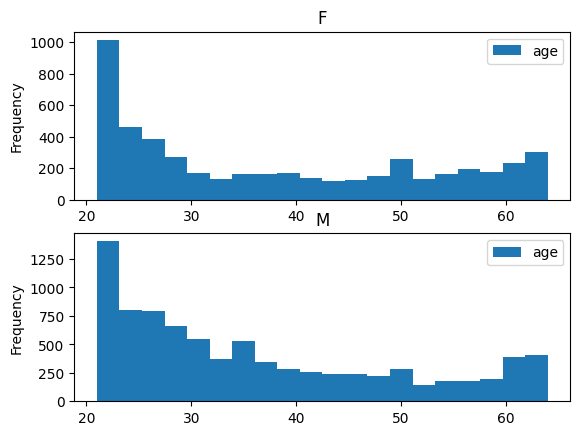

In [263]:
# I use several ways to draw the histogram of the age by gender
bp.plot.hist(column = 'age',by = 'gender', bins = 20)


array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

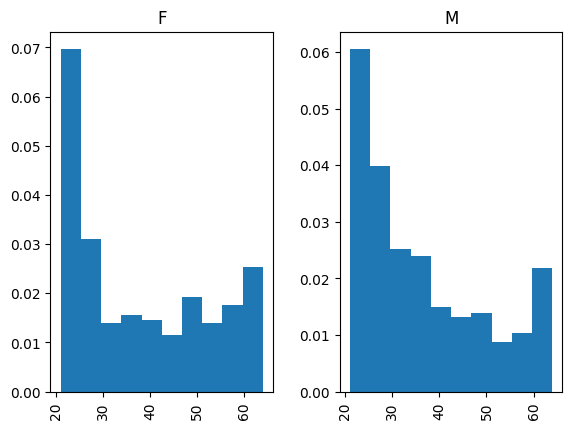

In [264]:
bp.age.hist(by=bp.gender, density=True)
# there are more male than female between 20 to 40 years old 

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

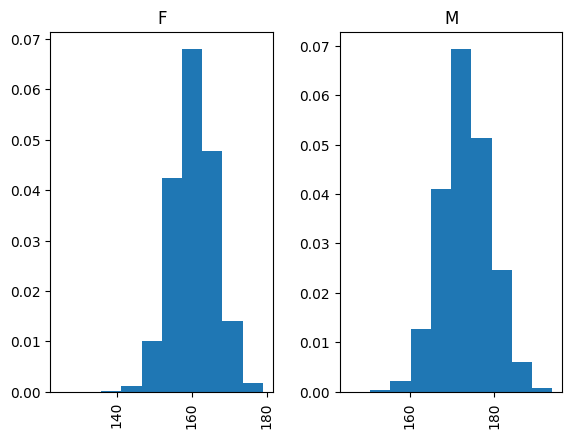

In [265]:
bp.height_cm.hist(by=bp.gender, density=True)
# Overall, Male is higher than female

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

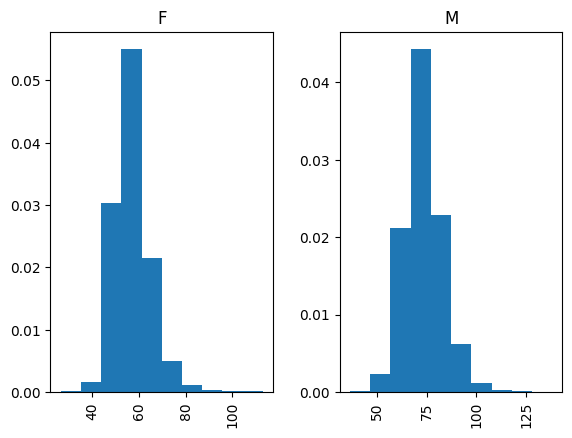

In [266]:
bp.weight_kg.hist(by=bp.gender, density=True)
# Overall, Male is heavier than female

array([<Axes: title={'center': 'F'}, ylabel='Frequency'>,
       <Axes: title={'center': 'M'}, ylabel='Frequency'>], dtype=object)

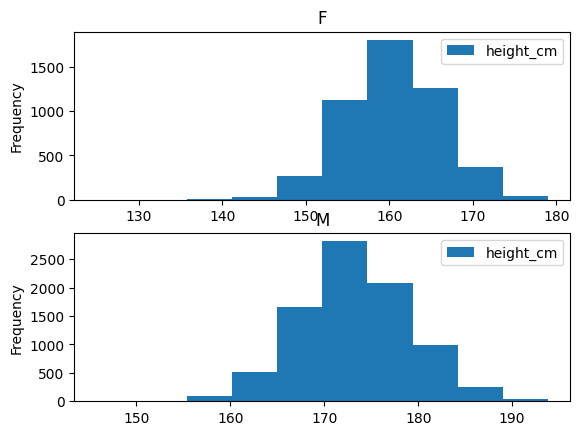

In [267]:
bp.plot.hist(column = 'height_cm', by = 'gender')

### Q5: 15 pt:
[Blood pressure](https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines) is reported as two numbers: diastolic (the lower number) and systolic (the higher number).  So, for example, if a person has a diastolic measurement of 80 and a systolic measurement of 120, the person's blood pressure would be reported as 120/80.

Blood pressure measurements fall into several categories:

Normal blood pressure. Your blood pressure is normal if it's below 120/80 mm Hg.

Elevated blood pressure. Elevated blood pressure is a systolic pressure ranging from 120 to 129 mm Hg and a diastolic pressure below (not above) 80 mm Hg. Elevated blood pressure may also be called prehypertension.

Stage 1 hypertension. Stage 1 hypertension is a systolic pressure ranging from 130 to 139 mm Hg or a diastolic pressure ranging from 80 to 89 mm Hg.

Stage 2 hypertension. More-severe hypertension, stage 2 hypertension is a systolic pressure of 140 mm Hg or higher or a diastolic pressure of 90 mm Hg or higher.

Hypertensive crisis. A blood pressure measurement higher than 180/120 mm Hg is an emergency situation that requires urgent medical care.


a) Report the number of people in each of those categories.

b) The guidelines were recently changed: prior to 2017, the guidelines set the threshold at 140/90 mm Hg for people younger than age 65 and 150/80 mm Hg for those ages 65 and older to be diagnosed with hypertension. Create and implement analyses that allow you to demonstrate how the change in guidelines affects the categorization of people into the different categories.
Make reasonable assumptions (and state them) about whether to use diastolic, systolic, both, or either of those measures when implementing your analysis.  Note that the new guidelines offer more categories than the older guidelines.

part(a)

In [268]:
normal = bp[(bp.systolic < 120)  & (bp.diastolic < 80) ].shape[0]
print(f'Number of people with normal blood pressure: {normal}')

Number of people with normal blood pressure: 2898


In [269]:
elevated = bp[(bp.systolic < 130) & (bp.systolic >= 120) & (bp.diastolic < 80) ].shape[0]
print(f'Number of people with elevated blood pressure: {elevated}')

Number of people with elevated blood pressure: 2090


In [270]:
stage1 = bp[((bp.systolic < 140) & (bp.systolic >= 130)) | ((bp.diastolic < 90) & (bp.diastolic >= 80))].shape[0]
print(f'Number of people with Stage 1 hypertension: {stage1}')

Number of people with Stage 1 hypertension: 5936


In [271]:
stage2 = bp[(bp.systolic >= 140) | (bp.diastolic >= 90)].shape[0]
print(f'Number of people with Stage 2 hypertension: {stage2}')

Number of people with Stage 2 hypertension: 4418


In [272]:
Hyper_crisis = bp[(bp.systolic >= 180) & (bp.diastolic >= 120)].shape[0]
print(f'Number of people with Hypertensive crisis: {Hyper_crisis}')

Number of people with Hypertensive crisis: 1


part(b)

Prior to 2017,  guidelines for people be diagnosed with hypertension.

For people younger than 65: Systolic ≥ 140 mm Hg or Diastolic ≥ 90 mm Hg

For those aged 65 and older: Systolic ≥ 150 mm Hg or Diastolic ≥ 80 mm Hg

We will count how many people fall into the hypertension category under both the old and new guidelines.

In [273]:
bp['> 65'] = bp['age'].apply(lambda x: 1 if x >= 65 else 0)


In [274]:
# For people younger than 65: Systolic ≥ 140 mm Hg or Diastolic ≥ 90 mm Hg be diagnosed as hypertension
less65 = bp[(bp['> 65'] == 0) & ((bp.diastolic >= 90) | (bp.systolic >= 140))].shape[0]
print(f'Number of people with hypertension who are younger than 65: {less65}')

Number of people with hypertension who are younger than 65: 4418


In [275]:
# For people aged 65 and older: Systolic ≥ 150 mm Hg or Diastolic ≥ 80 mm Hg be diagnosed as hypertension
older_65 = bp[(bp['> 65'] == 1) & ((bp.diastolic >= 80) | (bp.systolic >= 150))].shape[0]
print(f'Number of people with hypertension who are 65 and older: {older_65}')

Number of people with hypertension who are 65 and older: 0


For old guideline, there are total 4418 people be be diagnosed as hypertension.

In the new guidelines, a total of 5936 people were diagnosed with hypertension; 4418 of them were diagnosed with stage 2 hypertension; 1 person was diagnosed with hypertensive crisis. 

After the guideline was changed, the criteria for diagnosing hypertension were lowered, and the number of people diagnosed with hypertension increased. Those people who was diagnosed hypertensive  with new guideline are on the edge of severe hypertension. New guideline makes people pay more attention to the hypertensive and intervene in time.

In [276]:
# There are no people older than 65
bp['age'].sort_values().tail()  

1484     64.0
11054    64.0
11061    64.0
9901     64.0
9025     64.0
Name: age, dtype: float64

### Q6: 10 pt:
Create a new variable "age_class" that is "early" if age < 40, "middle" if age is between 40 and 60 (inclusive) and "late" if age > 60.  Report the mean and median number of sit-ups counts for each of those categories.


In [277]:
bp['age_class'] = bp['age'].apply(lambda x: 'early'if x < 40 else 'mid' if x <= 60 else 'late')

In [278]:
bp.age_class.head()

0    early
1    early
2    early
3    early
4    early
Name: age_class, dtype: object

In [279]:
bp.age_class.value_counts()

age_class
early    8453
mid      3976
late      964
Name: count, dtype: int64

In [280]:
bp.groupby('age_class')['sit-ups counts'].mean()

age_class
early    45.305217
late     24.060166
mid      31.815141
Name: sit-ups counts, dtype: float64

In [281]:
bp.groupby('age_class')['sit-ups counts'].median()

age_class
early    47.0
late     25.0
mid      32.0
Name: sit-ups counts, dtype: float64

### Q7: 15 pt:
Implement a function to calculate each person's Body Mass Index (BMI). Use that function to create a new Series called 'BMI' in your DataFrame.

> With the metric system, the formula for BMI is weight in kilograms divided by height in meters squared. Since height is commonly measured in centimeters, an alternate calculation formula, dividing the weight in kilograms by the height in centimeters squared, and then multiplying the result by 10,000, can be used. (https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html)

Using the pandas-matplotlib integration (i.e. do not use other visualization libraries), create two histograms of BMI: one for gender F and one for gender M.  Describe similarites and differences of the two histograms.

In [282]:
bp['BMI'] = bp['weight_kg'] / bp['height_cm']**2 * 10000

In [283]:
bp.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,> 65,age_class,BMI
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,early,25.344179
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,early,20.495868
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,early,24.181428
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,early,23.349562
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,early,22.412439


In [284]:
print(bp['BMI'].head())

0    25.344179
1    20.495868
2    24.181428
3    23.349562
4    22.412439
Name: BMI, dtype: float64


array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

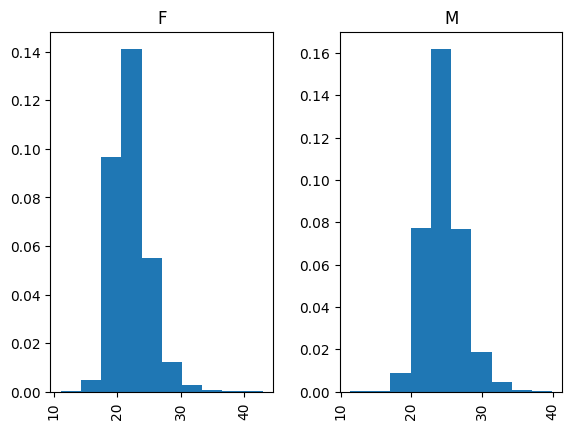

In [285]:
bp.BMI.hist(by=bp.gender, density=True)


### Similarities:

Both histograms shows that there is one peak for both genders.

### Differences:

The peak of the male distribution is more pronounced and narrower, the female histogram has a broader base and is less peaked than the male histogram. And the peak of female around early-20, the peak of male around mid-20,

### Q8: 12 pt:
Compare the mean values of height, weight, body fat %, grip force, sit and bend forward, and sit-ups count for gender F vs. gender M.  You should use both quantitative and visual methods in your work.  Where possible, you should use functions rather than just stand-alone code. You should also include a written summary of your findings.  Be sure to include units in your written summary.


In [286]:
bp.groupby('gender')['weight_kg'].mean().reset_index()

,gender,weight_kg
0,F,56.905899
1,M,73.580187


In [287]:
# calculate_means is to calculate mean of one column data
def calculate_means(dataframe, column):
    return dataframe.groupby('gender')[column].mean().reset_index()

column = ['height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts']

# get each column mean by gender of the data
means_tb = calculate_means(bp, column[0])
for i in column[1:]:
    means_df = calculate_means(bp, i)
    means_tb = pd.merge(means_tb, means_df, on = 'gender')

print(means_tb)


  gender   height_cm  weight_kg  body fat_%  gripForce  \
0      F  160.485404  56.905899   28.486085  25.817994   
1      M  173.257399  73.580187   20.188151  43.448420   

   sit and bend forward_cm  sit-ups counts  
0                18.839791       30.888348  
1                13.097073       44.939176  


### quantitative way:t-test

In [288]:
from scipy.stats import ttest_ind
# use t-test to test if the means of two groups are different
# calculate_ttest is to calculate t-test of two groups
for variable in column:
    male = bp[bp['gender'] == 'M'][variable]
    female = bp[bp['gender'] == 'F'][variable]
    t_stat, p_val = ttest_ind(male, female)
    if p_val < 0.05:
        print(f"{variable}: t-test={t_stat}, p-value={p_val}, significant")
    else:
        print(f"{variable}: t-test={t_stat}, p-value={p_val}, not significant")

height_cm: t-test=123.92840299126057, p-value=0.0, significant
weight_kg: t-test=105.26060814440552, p-value=0.0, significant
body fat_%: t-test=-76.48742318447472, p-value=0.0, significant
gripForce: t-test=154.39116603183484, p-value=0.0, significant
sit and bend forward_cm: t-test=-40.10568527573747, p-value=0.0, significant
sit-ups counts: t-test=62.39472458350077, p-value=0.0, significant


### visualization： use box-plot

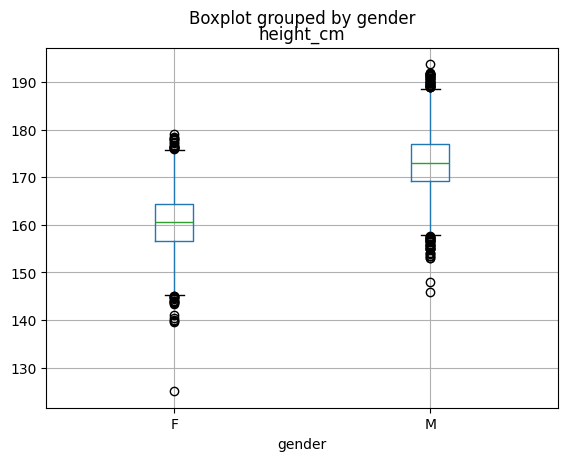

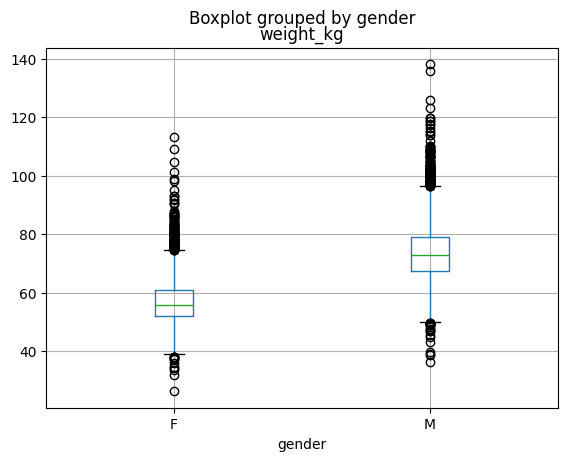

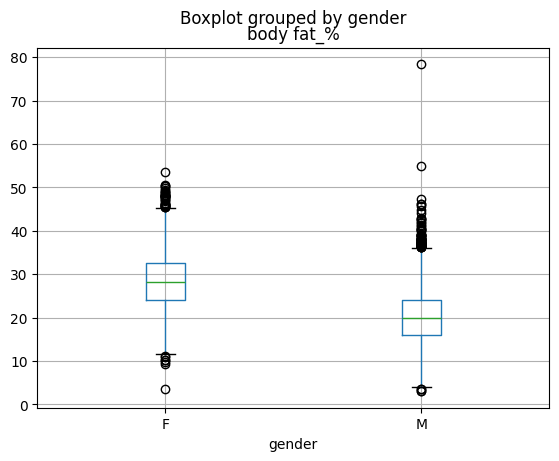

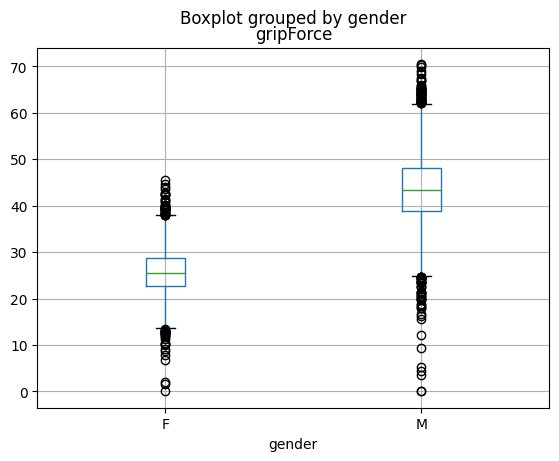

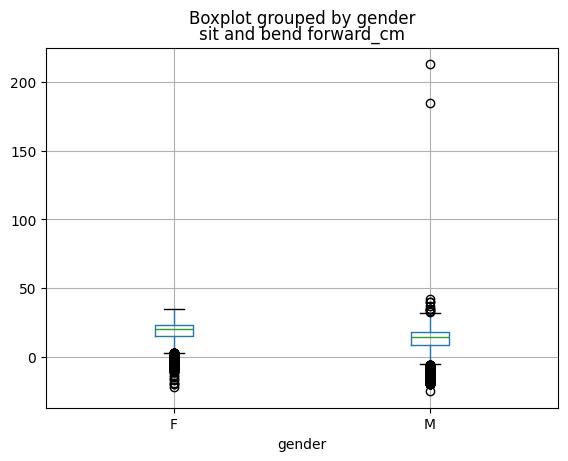

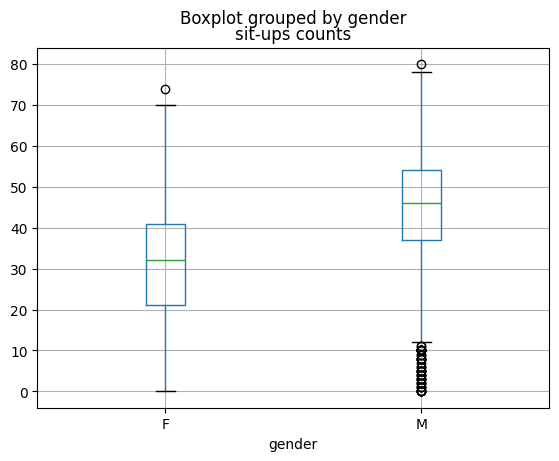

In [289]:
for i in column:
    bp.boxplot(column=i, by='gender')

From both quantitative and visual methods, we can see the difference between male and female in 'height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts' are significant.

### Q9: 18 pt:
Take a look at gripForce (a measure of strength), "sit and bend forward" (a measure of flexibility), and "sit-ups count" (a measures of strength and endurance of the abdominal and hip-flexor muscles).  For each of those measures, calculate their z-scores (i.e. subtract the mean of the variable from each observation, then divide by the standard deviation of that score).  Create an overall fitness score by adding the z-scores for each of those variables together, then use `pd.qcut()` (not `pd.cut()`) to assign them to four categories ranging from lowest score to highest score. As with previous questions, you should use one or more functions to implement your solution.  You should also include a written summary of your findings.  Be sure to include units in your written summary.

a) Report the number of individuals in each of the resulting categories.

b) Comment on the degree to which your categories correspond to the `class` column.

part(a)

In [290]:
def report_overall_fitness(dataframe):
    df = dataframe

    df['overall fitness score'] = (df['gripForce']-df['gripForce'].mean())/(df['gripForce'].std()) + (df['sit-ups counts']-df['sit-ups counts'].mean())/(df['sit-ups counts'].std())+ (df['sit and bend forward_cm']-df['sit and bend forward_cm'].mean())/(df['sit and bend forward_cm'].std()) 
    df['overall fitness class'] = pd.qcut(x=df['overall fitness score'], q=4, labels=['low', 'medium low', 'medium high', 'high'])

    return df

In [291]:
report_overall_fitness(bp)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,> 65,age_class,BMI,overall fitness score,overall fitness class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,early,25.344179,3.482339,high
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,early,20.495868,1.002506,medium high
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,early,24.181428,1.004454,medium high
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,early,23.349562,1.343026,medium high
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,early,22.412439,2.387494,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,early,24.241679,0.655845,medium high
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,early,19.788128,-1.465115,low
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,early,25.637073,3.004599,high
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0,late,27.031826,-5.158842,low


In [292]:
def cal_zscore(dataframe, column):
    return (dataframe[column] - dataframe[column].mean()) / dataframe[column].std()

def overall_score(df, column):
    overall_score = 0
    for i in column:
        overall_score += cal_zscore(df, i)
    return overall_score
        

In [293]:
column = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']


bp['overall fitness score'] = overall_score(bp,column)


In [294]:
bp['overall fitness category'] = pd.qcut(x=bp['overall fitness score'], q=4, labels=['low', 'medium low', 'medium high', 'high'])


In [295]:
bp.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,> 65,age_class,BMI,overall fitness score,overall fitness class,overall fitness category
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,early,25.344179,3.482339,high,high
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,early,20.495868,1.002506,medium high,medium high
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,early,24.181428,1.004454,medium high,medium high
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,early,23.349562,1.343026,medium high,medium high
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,early,22.412439,2.387494,high,high


In [296]:
bp['overall fitness category'].value_counts()


overall fitness category
low            3349
medium low     3348
medium high    3348
high           3348
Name: count, dtype: int64

part (b)

In [297]:
class_correspondence = pd.crosstab(bp['overall fitness category'], bp['class'])
class_correspondence

class,A,B,C,D
overall fitness category,,,,
low,87,404,887,1971
medium low,638,937,969,804
medium high,974,984,981,409
high,1649,1022,512,165


In [298]:
# Use the chi-square test to determine whether there is a statistically significant difference 
# between the distributions of the FitnessCategory and class columns.
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(class_correspondence)
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p_value}')
print(f'degrees of freedom: {dof}')
print(f'Expected values:\n {expected}')

Chi-square statistic: 4301.974602472526
p-value: 0.0
degrees of freedom: 9
Expected values:
 [[837.187486   836.93743    837.437542   837.437542  ]
 [836.93750467 836.68752333 837.187486   837.187486  ]
 [836.93750467 836.68752333 837.187486   837.187486  ]
 [836.93750467 836.68752333 837.187486   837.187486  ]]


Since p-value < 0.5, then there is siginificant correlation between two variable.

### IMPORTANT: Ensure your complete notebook runs without errors from top to bottom (check by using "Run All").

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas